#Upper-bound of OLS

**Created by Ulanbek Kurmaniyazov, Nadir Nuralin**

This notebook contains code part of the paper, where we proved the following theorem of the upper bound of the OLS from the book "Foundations of Machine Learning" of Mehryar Mohri, Afshin Rostamizadeh and Ameet Talwalkar.

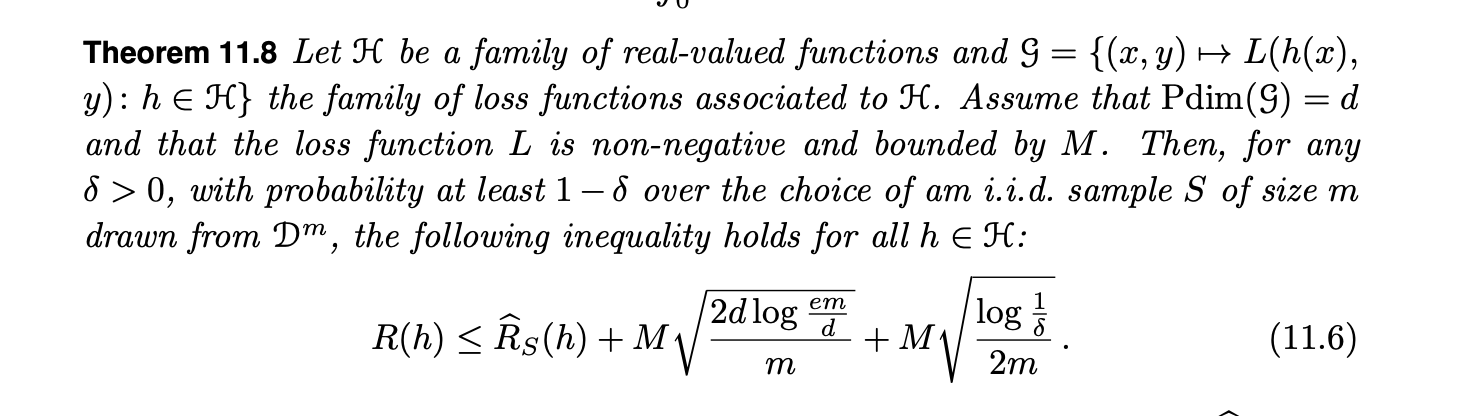

Importing all of the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from math import sqrt

We are using function make_regression that generates regression problem, and the following code is to show how the function works.   

In [7]:
X, y = datasets.make_regression(n_samples = 5000, n_features = 10,
                                n_targets = 1, noise = 1.0)
dfx = pd.DataFrame(X)
dfy = pd.DataFrame(y, columns = ['target'])

df = pd.concat([dfx, dfy], axis = 1)
df

,0,1,2,3,4,5,6,7,8,9,target
0,0.747021,0.202922,-0.396844,0.011174,1.240821,-0.614864,-0.042069,0.100876,0.087365,-0.071407,72.738656
1,-0.126451,-0.252532,0.160775,-0.200787,2.310006,-0.694992,0.649816,2.052442,-0.482768,-1.995347,154.590262
2,-0.414934,-1.771491,-1.730324,-0.050901,0.849421,-0.337530,-0.368265,-1.127820,-0.188060,-0.736540,-188.931247
3,-0.763110,1.675305,-0.556557,-1.475839,-0.572104,-0.601826,-0.715529,-0.851030,0.044640,1.390331,-166.269381
4,1.003763,0.716241,0.557402,0.255616,-0.067273,0.396406,-0.268498,-1.957515,-0.145295,0.572968,-56.791059
...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.132477,-0.133486,-0.383814,0.094319,0.390883,-0.389217,1.053252,-1.593996,-0.413482,-0.792999,-74.582092
4996,0.561276,-2.149509,2.011496,0.696228,0.136887,1.911722,1.495669,-0.109185,-0.764874,-0.717110,105.044608
4997,-0.582696,-0.465408,0.694909,1.771896,-1.598238,-1.637960,-0.575291,-0.235091,-2.192255,-0.648112,-351.909368
4998,1.149261,0.384134,-0.530324,-0.827940,1.900634,-0.124840,1.423122,1.139584,-1.048691,-0.434354,189.164833


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

e_test = 1 - lr.score(X_test, y_test)
e_train = 1 - lr.score(X_train, y_train)
print(f'Empirical error: {e_train} /n True error: {e_test}')
print(e_test-e_train)

Empirical error: 4.295234739037923e-05 /n True error: 4.337884314764562e-05
4.2649575726638744e-07


The following function creates a dataset with the number of samples $2m$ (because m samples will go to training and m for testing) and number of features $d$, divides the dataset to training and test set and trains according to training set. Finally, returns the absolute value of the test error and training error difference.

In [60]:
def linreg_for_check(m, d):
  X, y = datasets.make_regression(n_samples = 2*m, n_features = d, noise = 0, random_state=42)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)
  lr = LinearRegression()
  lr.fit(X_train, y_train)

  
  e_test = mean_squared_error(y_test, lr.predict(X_test))
  e_train = mean_squared_error(y_train, lr.predict(X_train))

  return abs(e_test-e_train)

Creating the list of integers for number of samples from 100 to 10000 with the step 100. The same for the number of features from 3 to 100.

In [61]:
m_list = [j for j in range(100, 10000, 100)]
d_list = [i for i in range(3, 100)]

Creating a list of the error differences with the fixed number of features = 10. Then, we append the results of the function defined before multiplied by the squareroot of m.

In [62]:
E_m = []
for m in m_list:
  E_m.append(linreg_for_check(m, 10)*sqrt(m))

Text(0, 0.5, '(E_test-E_train)*sqrt(m)')

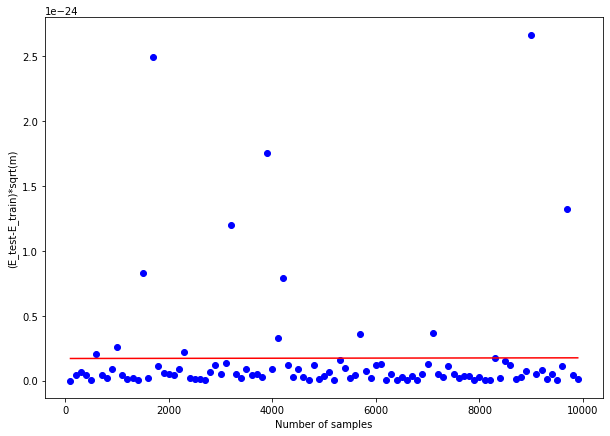

In [63]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

z = np.polyfit(m_list, E_m, 1)
p = np.poly1d(z)


plt.scatter(m_list, E_m, color='b')
plt.plot(m_list, p(m_list), color = 'r')
plt.xlabel('Number of samples')
plt.ylabel('(E_test-E_train)*sqrt(m)')

Doing the same thing with the $d$ for a fixed number of samples = 5000. However, we divide by the squareroot of d according to formula of the bound.

In [66]:
E_d = []

for d in d_list:
  E_d.append(linreg_for_check(5000, d)/sqrt(d))

Text(0, 0.5, '(E_test-E_train)/sqrt(d)')

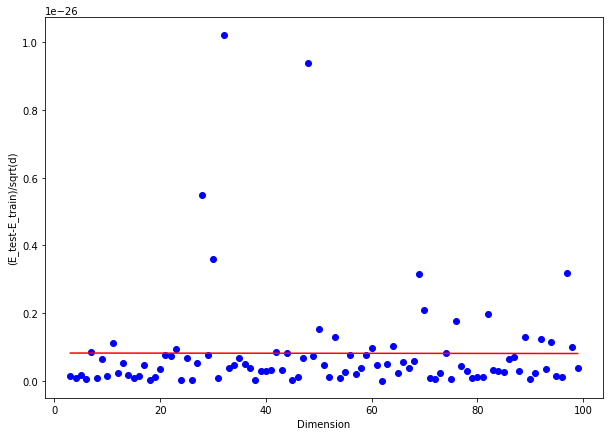

In [68]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

z = np.polyfit(d_list, E_d, 1)
p = np.poly1d(z)

plt.scatter(d_list, E_d, color = 'b')
plt.plot(d_list, p(d_list), color = 'r')
plt.xlabel('Dimension')
plt.ylabel('(E_test-E_train)/sqrt(d)')

##Real world data

Cancer regression dataset contains of the 32 columns of data and target column. We have dropped the columns that are object type or have Nan values. Afterwords we used the same algorithm that we used before.

In [ ]:
data = pd.read_csv('cancer_reg.csv', encoding="latin-1")

y = data['TARGET_deathRate']
X = data.drop(columns=['TARGET_deathRate', 'binnedInc', 'Geography', 'PctSomeCol18_24', 'PctPrivateCoverageAlone', 'PctEmployed16_Over'])
X.shape

(3047, 28)

In [ ]:
d_l = [i for i in range(2, 29)]
m_l = [j for j in range(100, 3000, 50)]

In [ ]:
def test_data(X, y, d, m):
  X = X.iloc[:m,:d]
  y = y.iloc[:m]


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=142)

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  e_test = mean_squared_error(y_test, lr.predict(X_test))
  e_train = mean_squared_error(y_train, lr.predict(X_train))

  return abs(e_test-e_train)

In [ ]:
e_d = []

for d in d_l:
  e_d.append(test_data(X, y, d, 3047)/sqrt(d))

Text(0, 0.5, '(E_test-E_train)/sqrt(d)')

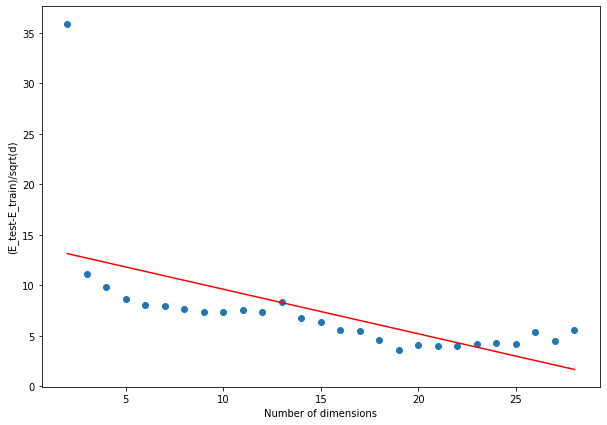

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

z = np.polyfit(d_l, e_d, 1)
p = np.poly1d(z)

plt.scatter(d_l, e_d)
plt.plot(d_l, p(d_l), color = 'r')
plt.xlabel('Number of dimensions')
plt.ylabel('(E_test-E_train)/sqrt(d)')

In [ ]:
e_m = []

for m in m_l:
  e_m.append(test_data(X, y, 29, m)*sqrt(m))

Text(0, 0.5, '(E_test-E_train)*sqrt(m)')

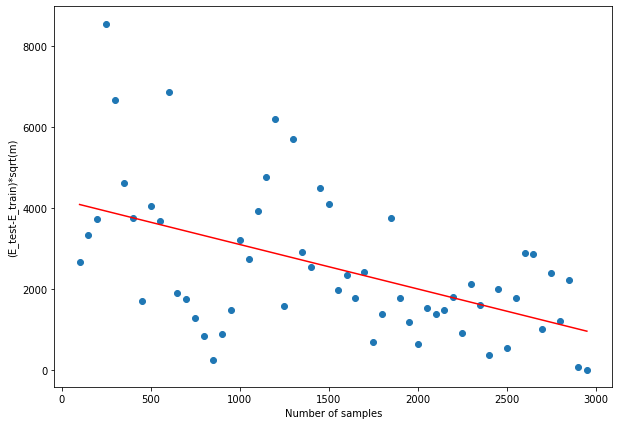

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

z = np.polyfit(m_l, e_m, 1)
p = np.poly1d(z)

plt.scatter(m_l, e_m)
plt.plot(m_l, p(m_l), color = 'r')
plt.xlabel('Number of samples')
plt.ylabel('(E_test-E_train)*sqrt(m)')